# Conhecendo os dados

### Desafio: utilizando parâmetros do json_normalize

Ao normalizar o objeto JSON durante a aula passamos simplesmente ```pd.json_normalize(<dados>)``` mas o método json_normalize possui diversos parâmetros para trabalhar com estruturas de dados mais complexas.

Você recebeu a tarefa de normalizar o seguinte arquivo JSON chamado ```“informacoes.json”``` referente a algumas informações de identificação de um cliente. O arquivo possui o seguinte conteúdo:

```python
{
  "nome": "João",
  "idade": 28,
  "enderecos": [
    {
      "tipo": "casa",
      "rua": "Rua A",
      "numero": 123,
      "cidade": "São Paulo"
    },
    {
      "tipo": "trabalho",
      "rua": "Rua B",
      "numero": 456,
      "cidade": "Rio de Janeiro"
    }
  ]
}
```

O resultado final deve ser um Pandas DataFrame que possui a seguinte estrutura:

![tabela](assets/pandas_limpeza_tratamento_de_dados_aula1.png)

Como podemos fazer isso?

In [401]:
import pandas as pd
import json

In [402]:
url = 'pandas-dados/informacoes.json'

In [403]:
dados = pd.read_json(url)
dados.head()

,nome,idade,enderecos
0,João,28,"{'tipo': 'casa', 'rua': 'Rua A', 'numero': 123..."
1,João,28,"{'tipo': 'trabalho', 'rua': 'Rua B', 'numero':..."


In [404]:
pd.json_normalize(dados['enderecos'])

,tipo,rua,numero,cidade
0,casa,Rua A,123,São Paulo
1,trabalho,Rua B,456,Rio de Janeiro


In [405]:
with open(url) as arquivo:
    json_bruto = json.load(arquivo)

In [406]:
json_bruto

{'nome': 'João',
 'idade': 28,
 'enderecos': [{'tipo': 'casa',
   'rua': 'Rua A',
   'numero': 123,
   'cidade': 'São Paulo'},
  {'tipo': 'trabalho',
   'rua': 'Rua B',
   'numero': 456,
   'cidade': 'Rio de Janeiro'}]}

In [407]:
dados_normlizados = pd.json_normalize(json_bruto, record_path='enderecos',meta=["nome", "idade"])
dados_normlizados.head()

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


### Desafio: tratando os dados

Você recebeu e fez o download o arquivo JSON chamado “dados.json” que possui o seguinte conteúdo:

```json
{
  "pessoas": [
    {
      "nome": "João",
      "idade": "25",
      "endereco": {
        "rua": "Rua A",
        "numero": 123,
        "cidade": "São Paulo"
      },
      "telefones": [
        "11 1111-1111",
        "11 2222-2222"
      ]
    },
    {
      "nome": "Maria",
      "idade": 30,
      "endereco": {
        "rua": "",
        "numero": 456,
        "cidade": "Rio de Janeiro"
      },
      "telefones": [
        "21 3333-3333"
      ]
    }
  ]
}
```

Sua tarefa é realizar alguns tratamentos e deixar esse arquivo JSON como um Pandas DataFrame, sem dados vazios e com a tipagem das colunas de forma correta. Como isso pode ser feito?

In [408]:
import pandas as pd
import json

In [409]:
url = 'pandas-dados/dados.json'

In [410]:
with open(url) as arquivo:
    dados = json.load(arquivo)

In [411]:
dados

{'pessoas': [{'nome': 'João',
   'idade': '25',
   'endereco': {'rua': 'Rua A', 'numero': 123, 'cidade': 'São Paulo'},
   'telefones': ['11 1111-1111', '11 2222-2222']},
  {'nome': 'Maria',
   'idade': 30,
   'endereco': {'rua': '', 'numero': 456, 'cidade': 'Rio de Janeiro'},
   'telefones': ['21 3333-3333']}]}

In [412]:
df = pd.json_normalize(dados, record_path=['pessoas'])
df

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 228.0+ bytes


analisando as informacoes acima, preciso corrigir:

1. acertar o tipo da coluna idade
2. retirar a linha com dados nulos

In [414]:
df['idade'] = df['idade'].astype(int)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      int64 
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(2), object(4)
memory usage: 228.0+ bytes


In [416]:
filtro_nulas = df['endereco.rua'] != ''

In [417]:
df_filtrado = df[filtro_nulas].copy()
df_filtrado

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


### Desafio: tratando uma base de dados

Para facilitar a análise dos dados de cadastro de cursos de uma plataforma, você recebeu um arquivo chamado [cursos_cadastrados.json](https://cdn3.gnarususercontent.com.br/2929-pandas/cursos_cadastrados.json). Você foi informado que esses dados podem apresentar problemas que podem prejudicar a análise e interpretação correta dos dados.

Para resolver isso, foi solicitado que você identifique e remova as amostras que apresentam os seguintes problemas:

- Valores nulos: são valores ausentes em algumas das colunas que devem ser preenchidos para que a análise seja correta.
- Duplicatas: registros iguais que podem prejudicar a análise dos dados, já que estão representando a mesma informação.
- Strings vazias: valores de texto que não apresentam nenhum conteúdo escrito, o que pode dificultar a análise de dados, principalmente se a coluna tiver muitos valores assim.
- Conversão de tipos: algumas colunas do arquivo podem estar no tipo de dados errado, como texto em vez de número, o que pode prejudicar a análise. Nesse caso você deve realizar a conversão para o tipo correto de cada coluna.

Dentro desse contexto, você precisará de uma abordagem sistemática para limpar os dados. Assim, como isso pode ser feito?

Lembrando que o conteúdo de cursos_cadastrados.json é:

```python 
[
    {
        "curso": "Introdução à programação",
        "categoria": "Programação",
        "carga_horaria": "20 horas",
        "concluintes": 100,
        "data_inicio": "2022-01-01",
        "data_conclusao": "2022-01-20",
        "descricao": "Curso introdutório à programação com Python",
        "preco": "99.90",
        "instrutor": {
            "nome": "João Silva",
            "email": "joao.silva@emailaleatorio.com",
            "telefone": "(11) 9999-9999"
        }
    },
    {
        "curso": "Excel para iniciantes",
        "categoria": "Produtividade",
        "carga_horaria": null,
        "concluintes": null,
        "data_inicio": null,
        "data_conclusao": null,
        "descricao": null,
        "preco": null,
        "instrutor": {
            "nome": "Maria Oliveira",
            "email": "maria.oliveira@emailaleatorio.com",
            "telefone": "(11) 8888-8888"
        }
    },
    {
        "curso": "Marketing digital para negócios",
        "categoria": "Marketing",
        "carga_horaria": "30 horas",
        "concluintes": 75,
        "data_inicio": "2022-03-01",
        "data_conclusao": "2022-03-31",
        "descricao": "Curso introdutório em marketing",
        "preco": 89.90,
        "instrutor": {
            "nome": "Ana Santos",
            "email": "ana.santos@emailaleatorio.com",
            "telefone": "(11) 7777-7777"
        }
    },
    {
        "curso": "Inteligência artificial",
        "categoria": "Programação",
        "carga_horaria": "40 horas",
        "concluintes": "",
        "data_inicio": "2022-04-01",
        "data_conclusao": "",
        "descricao": "Curso avançado sobre inteligência artificial com Python",
        "preco": 129.90,
        "instrutor": {
            "nome": "",
            "email": "contato@emailaleatorio.com",
            "telefone": ""
        }
    },
    {
        "curso": "Inglês para negócios",
        "categoria": "Idiomas",
        "carga_horaria": "20 horas",
        "concluintes": 30,
        "data_inicio": "",
        "data_conclusao": "",
        "descricao": "Curso de inglês para negócios",
        "preco": 69.90,
        "instrutor": {
            "nome": "John Smith",
            "email": "",
            "telefone": ""
        }
    },
    {
        "curso": "Introdução à programação",
        "categoria": "Programação",
        "carga_horaria": "20 horas",
        "concluintes": 100,
        "data_inicio": "2022-01-01",
        "data_conclusao": "2022-01-20",
        "descricao": "Curso introdutório à programação com Python",
        "preco": "99.90",
        "instrutor": {
            "nome": "João Silva",
            "email": "joao.silva@emailaleatorio.com",
            "telefone": "(11) 9999-9999"
        }
    }
]
```

In [418]:
url = 'pandas-dados/cursos_cadastrados.json'

with open(url) as f:
    dados = json.load(f)

In [419]:
dados_brutos = pd.json_normalize(dados)
dados_brutos

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [420]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               6 non-null      object
 1   categoria           6 non-null      object
 2   carga_horaria       5 non-null      object
 3   concluintes         5 non-null      object
 4   data_inicio         5 non-null      object
 5   data_conclusao      5 non-null      object
 6   descricao           5 non-null      object
 7   preco               5 non-null      object
 8   instrutor.nome      6 non-null      object
 9   instrutor.email     6 non-null      object
 10  instrutor.telefone  6 non-null      object
dtypes: object(11)
memory usage: 660.0+ bytes


In [421]:
dados_brutos.isnull().sum()

curso                 0
categoria             0
carga_horaria         1
concluintes           1
data_inicio           1
data_conclusao        1
descricao             1
preco                 1
instrutor.nome        0
instrutor.email       0
instrutor.telefone    0
dtype: int64

In [422]:
filtrando = dados_brutos.isna().any(axis=1)

In [423]:
dados_brutos[filtrando]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888


In [424]:
dados_brutos.dropna(inplace=True)

In [425]:
dados_brutos

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [426]:
dados_brutos.duplicated()

0    False
2    False
3    False
4    False
5     True
dtype: bool

In [427]:
dados_brutos.drop_duplicates(inplace=True)

In [428]:
dados_brutos

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


In [429]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 4
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               4 non-null      object
 1   categoria           4 non-null      object
 2   carga_horaria       4 non-null      object
 3   concluintes         4 non-null      object
 4   data_inicio         4 non-null      object
 5   data_conclusao      4 non-null      object
 6   descricao           4 non-null      object
 7   preco               4 non-null      object
 8   instrutor.nome      4 non-null      object
 9   instrutor.email     4 non-null      object
 10  instrutor.telefone  4 non-null      object
dtypes: object(11)
memory usage: 384.0+ bytes


In [430]:
dados_brutos[dados_brutos['instrutor.nome'] == "" ]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,


In [431]:
dados_brutos[dados_brutos['data_conclusao'] == "" ]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


In [432]:
dados_brutos.replace('', pd.NA, inplace=True)

In [433]:
dados_brutos

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,<NA>,2022-04-01,<NA>,Curso avançado sobre inteligência artificial c...,129.9,<NA>,contato@emailaleatorio.com,<NA>
4,Inglês para negócios,Idiomas,20 horas,30,<NA>,<NA>,Curso de inglês para negócios,69.9,John Smith,<NA>,<NA>


In [434]:
dados_brutos.dropna(subset='data_conclusao',inplace=True)

In [435]:
dados_brutos

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [436]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      object
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: object(11)
memory usage: 192.0+ bytes


In [437]:
dados_brutos['preco'] = dados_brutos['preco'].astype(float)
dados_brutos['concluintes'] = dados_brutos['concluintes'].astype(int)
dados_brutos[['data_inicio', 'data_conclusao']] = dados_brutos[['data_inicio', 'data_conclusao']].apply(pd.to_datetime)

In [438]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int64         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 192.0+ bytes


In [439]:
type(dados_brutos)

pandas.core.frame.DataFrame

### Desafio: identificando fraudes

Você trabalha em um banco como cientista de dados e recebeu o seguinte conjunto de dados para analisar:

```python
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

```

Foi informado que nessa base de dados há possíveis fraudes que podem ser identificadas através dos outliers no “valor da transação”. Basicamente a fraude seria um outlier.

Sua missão é construir uma função que recebe dois parâmetros, a coluna que você quer analisar se tem outlier e o DataFrame em questão. A intenção de fazer isso é aproveitar novamente essa função tanto para outras colunas quanto para outros DataFrames futuramente em outras análises. O método que deve ser implementado para identificação do outlier é do intervalo interquartil.

Como podemos fazer isso?

In [440]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID da transação     30 non-null     int64         
 1   Valor da transação  30 non-null     int64         
 2   Data da transação   30 non-null     datetime64[ns]
 3   Local da transação  30 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ KB


In [442]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

<Axes: xlabel='Valor da transação'>

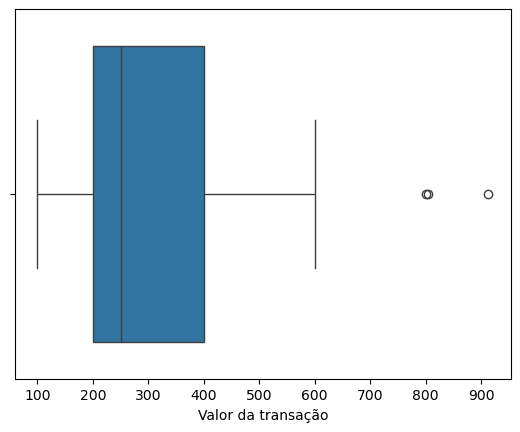

In [ ]:
sns.boxplot(x=df['Valor da transação'])

In [ ]:
Q1 = df['Valor da transação'].quantile(.25)
Q3 = df['Valor da transação'].quantile(.75)
IQR = Q3-Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

In [ ]:
filtro_outliers = (df['Valor da transação'] < limite_inferior) | (df['Valor da transação'] > limite_superior)
filtro_outliers

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
Name: Valor da transação, dtype: bool

In [ ]:
df[filtro_outliers]

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"


In [ ]:
def verifica_fraude(nome_coluna: str, dataframe):
    Q1 = df[nome_coluna].quantile(.25)
    Q3 = df[nome_coluna].quantile(.75)
    IQR = Q3-Q1
    limite_inferior = Q1 - 1.5*IQR
    limite_superior = Q3 + 1.5*IQR

    outlier_filtro = (df[nome_coluna] < limite_inferior) | (df[nome_coluna] > limite_superior)

    outlier = dataframe[outlier_filtro]

    return outlier


In [ ]:
print(f'{verifica_fraude('Valor da transação', df)}')

    ID da transação  Valor da transação Data da transação Local da transação
5                 6                 913        2022-01-06   Nova Iorque, EUA
16               17                 805        2022-01-17   Los Angeles, EUA
28               29                 800        2022-01-29         Miami, EUA
